CAPEX

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import folium
from data_processing import CF_100, CF_150, CF_PV, locs_s, locs_w 
from CAPEX_OPEX_calculations import capex_ns_wf_SP335HH100, capex_ns_wf_SP335HH150, capex_off_wf_SP335HH100,capex_off_wf_SP335HH150, capex_on_wf_SP277HH100, capex_on_wf_SP277HH150,capex_on_wf_SP199HH100, capex_on_wf_SP199HH150, capex_on_wf_SP335HH100,capex_on_wf_SP335HH150, capex_pv_try, capex_pv_low, capex_pv_high, capex_pv_mod
# from CAPEX_OPEX_calculations import opex_off_high, opex_off_low, opex_off_mod, opex_on_high, opex_on_low, opex_on_mod, opex_pv_high, opex_pv_low, opex_pv_mod

In [18]:
# import does not work: 
# SOLAR
dolltoeur= 0.92 
opex_pv_low= 14205*dolltoeur # EUR/MW-year
opex_pv_high= 17355*dolltoeur # EUR/MW-year
opex_pv_mod= 15072*dolltoeur 

# ----------------
# WIND
opex_on_high=43000*dolltoeur
opex_on_low= 38298*dolltoeur
opex_on_mod=40791*dolltoeur

opex_off_high= 109405*dolltoeur
opex_off_low= 87437*dolltoeur
opex_off_mod= 94648*dolltoeur

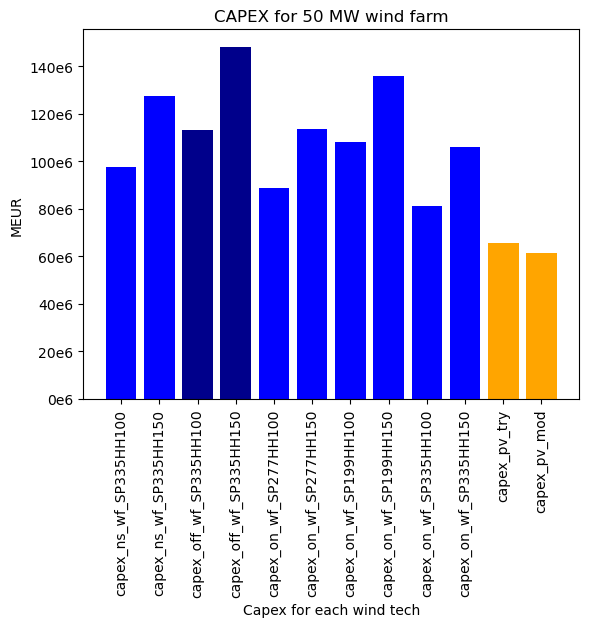

In [9]:
#  VISUALIZATION

x_values = ['capex_ns_wf_SP335HH100', 'capex_ns_wf_SP335HH150', 'capex_off_wf_SP335HH100',
            'capex_off_wf_SP335HH150', 'capex_on_wf_SP277HH100', 'capex_on_wf_SP277HH150',
            'capex_on_wf_SP199HH100', 'capex_on_wf_SP199HH150', 'capex_on_wf_SP335HH100',
            'capex_on_wf_SP335HH150', 'capex_pv_try','capex_pv_mod']
colors = ['darkblue' if 'off' in x else 'blue' if 'pv' not in x else 'orange' if 'pv' in x else 'brown' for x in x_values]
y_values = [capex_ns_wf_SP335HH100, capex_ns_wf_SP335HH150, capex_off_wf_SP335HH100,
            capex_off_wf_SP335HH150, capex_on_wf_SP277HH100, capex_on_wf_SP277HH150,
            capex_on_wf_SP199HH100, capex_on_wf_SP199HH150, capex_on_wf_SP335HH100,
            capex_on_wf_SP335HH150, capex_pv_try, capex_pv_mod]

plt.gca().yaxis.set_major_formatter(lambda x, _: '{:.0f}e6'.format(x/1e6))
plt.bar(x_values, y_values, color= colors)
plt.xlabel('Capex for each wind tech')
plt.ylabel('MEUR')
plt.title('CAPEX for 50 MW wind farm')
plt.xticks(rotation=90)
plt.show()

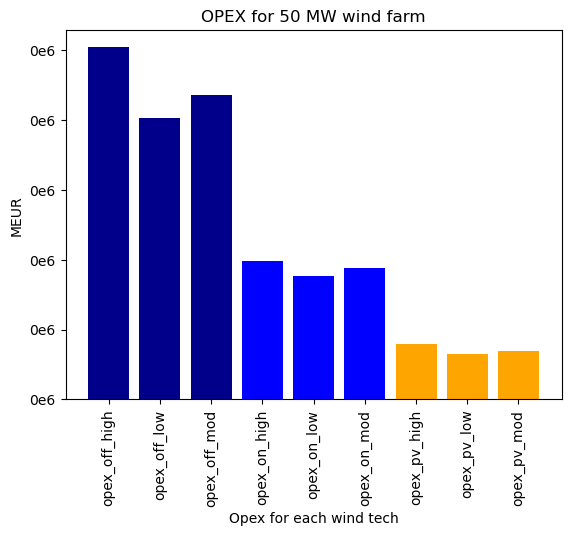

In [19]:
#  VISUALIZATION

x_values = ['opex_off_high', 'opex_off_low', 'opex_off_mod',
            'opex_on_high', 'opex_on_low', 'opex_on_mod',
            'opex_pv_high', 'opex_pv_low', 'opex_pv_mod']

colors = ['darkblue' if 'off' in x else 'blue' if 'pv' not in x else 'orange' if 'pv' in x else 'brown' for x in x_values]

y_values = [opex_off_high, opex_off_low, opex_off_mod,
            opex_on_high, opex_on_low, opex_on_mod,
            opex_pv_high, opex_pv_low, opex_pv_mod]

plt.gca().yaxis.set_major_formatter(lambda x, _: '{:.0f}e6'.format(x/1e6))
plt.bar(x_values, y_values, color=colors)
plt.xlabel('Opex for each wind tech')
plt.ylabel('MEUR')
plt.title('OPEX for 50 MW wind farm')
plt.xticks(rotation=90)
plt.show()


In [20]:

# {'LOC_1': '13.79%', 'LOC_2': '12.68%', 'LOC_3': '12.48%', 'LOC_4.2': '12.36%', 
# 'LOC_5.2': '19.28%', 'LOC_6': '12.53%', 'LOC_7': '13.38%', 'LOC_8.2': '15.66%',
# 'LOC_9': '14.24%', 'LOC_10': '12.90%'}

# SOLAR
locations_pv = [(49.217226868, 9.210566574),   # Germany: DE4-S (BDH)
             (53.939113, 14.084473),        # Germany: DE4-E (BENZ)
             (52.083961944, 15.272597423),  # Poland: PL (Zary VA)
             (50.987026, 6.322817),         # Germany: DE4-W
             (43.425705, 5.259797),        # France: FR
             (50.823722, 3.69278),          # Belgium. Onshore: Sint-Maria-Horebeke
             (55.712607, 11.103058),        # DK2. Onshore
             (45.279477, -1.074957),        # FR: Bordeaux
             (47.640965, 11.589237),        # DE4-S (Super Low Wind)
             (50.013034, 19.931001)         # PL: low wind zone
             ]        
            
# FIND SOALR CAPEX
capex_solar = [capex_pv_mod, capex_pv_mod, capex_pv_mod, capex_pv_mod, capex_pv_mod, capex_pv_mod, capex_pv_mod, capex_pv_mod, capex_pv_mod, capex_pv_mod]  # CAPEX values

# Create a folium map centered at the mean of all locations
map_center = [sum(x[0] for x in locations_pv) / len(locations_pv),
              sum(x[1] for x in locations_pv) / len(locations_pv)]
m2 = folium.Map(location=map_center, zoom_start=4)

# Add markers to the map with pop-up information
for i in range(len(locations_pv)):
    loc_title = locs_s[i]
    # cf_100_value = CF_100[locs_w[i]]
    # cf_150_value = CF_150[locs_w[i]]
    cf_pv_value = CF_PV[locs_s[i]]
    
    folium.Marker(location=locations_pv[i],
                  popup=f"Title: {loc_title}<br>CAPEX: {capex_solar[i]}, CF_pv: {cf_pv_value}").add_to(m2)

# Display the map
m2


In [22]:
import folium
from data_processing import CF_100, CF_150, CF_PV, locs_s, locs_w 
# WIND
locations = [(49.217226868, 9.210566574),   # Germany: DE4-S (BDH)
             (53.939113, 14.084473),        # Germany: DE4-E (BENZ)
             (52.083961944, 15.272597423),  # Poland: PL (Zary VA)
             (60.812663209, 21.444728425),  # Finland: Uki (VA)
             (54.662712, 3.073425),         # Netherlands. Offshore (Vlieland, Frisia)-SP335, 5.1
             (50.823722, 3.69278),          # Belgium. Onshore: Sint-Maria-Horebeke (point 6)
             (55.712607, 11.103058),        # DK2. Onshore - SP335, 7
             (56.407823, 11.502686),        # DK2 Offshore - SP335, 8.1
             (47.640965, 11.589237),        # DE4-S (Super Low Wind)
             (50.013034, 19.931001)]         # PL: low wind zone
        

capex_100 = [capex_on_wf_SP199HH100, capex_on_wf_SP277HH100, capex_on_wf_SP199HH100, capex_on_wf_SP277HH100, capex_off_wf_SP335HH100, capex_on_wf_SP277HH100, capex_on_wf_SP335HH100, capex_off_wf_SP335HH100, capex_on_wf_SP199HH100, capex_on_wf_SP199HH100]  # CAPEX values
capex_150= [capex_on_wf_SP199HH150, capex_on_wf_SP277HH150, capex_on_wf_SP199HH150, capex_on_wf_SP277HH150, capex_off_wf_SP335HH150, capex_on_wf_SP277HH150, capex_on_wf_SP335HH150, capex_off_wf_SP335HH150, capex_on_wf_SP199HH150, capex_on_wf_SP199HH150]
# Create a folium map centered at the mean of all locations
map_center = [sum(x[0] for x in locations) / len(locations),
              sum(x[1] for x in locations) / len(locations)]
m1 = folium.Map(location=map_center, zoom_start=4)

# Add markers to the map with pop-up information
for i in range(len(locations)):
    loc_title = locs_w[i]
    cf_100_value = CF_100[locs_w[i]]
    cf_150_value = CF_150[locs_w[i]]
    
    folium.Marker(location=locations[i],
                  popup=f"Title: {loc_title}<br>CAPEX_100 (MEur): {capex_100[i]/1000000:.2f}, CAPEX_150 (MEur): {capex_150[i]/1000000:.2f}, CF_100: {cf_100_value}, CF_150: {cf_150_value}").add_to(m1)

# Display the map
m1